# Argentina: inflation, unemployment and poverty under different governments (1990–2024)

## Project overview (EN)

This notebook analyzes how inflation, unemployment, and poverty evolved in Argentina between 1990 and 2024 using annual World Bank indicators. The goal is to build a clean dataset, visualize long‑term trends, and relate them to different governments in order to understand the macroeconomic context that any “exit plan” for Argentina must consider. The analysis is descriptive on purpose: it does not try to prove strict causality, but to provide an intuitive, data‑driven narrative of Argentina’s economic challenges.

## Resumen del proyecto (ES)

Este notebook analiza cómo evolucionaron la inflación, el desempleo y la pobreza en Argentina entre 1990 y 2024 usando indicadores anuales del Banco Mundial. El objetivo es construir un dataset limpio, visualizar los patrones de largo plazo y relacionarlos con los distintos gobiernos para entender el contexto macroeconómico que cualquier “plan de salida” para Argentina tiene que tener en cuenta. El análisis es deliberadamente descriptivo: no busca probar causalidad estricta, sino ofrecer una narrativa intuitiva, basada en datos, sobre los desafíos económicos del país.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("tab10")
sns.set_context("talk")  # larger text for notebook readability

In [14]:
def reshape_wb_indicator(path_csv, value_name):
    """
    Read a standard World Bank CSV, filter Argentina
    and return a DataFrame with columns: year, value_name.
    """
    df_raw = pd.read_csv(path_csv, skiprows=4)
    df_arg = df_raw[df_raw["Country Code"] == "ARG"]
    year_cols = [c for c in df_arg.columns if c.isdigit()]

    df_long = (
        df_arg[year_cols]
        .T
        .reset_index()
        .rename(columns={"index": "year", df_arg.index[0]: value_name})
    )

    df_long["year"] = df_long["year"].astype(int)
    df_long[value_name] = pd.to_numeric(df_long[value_name], errors="coerce")
    return df_long


### Data sources & file preparation (EN)

All three series come from the World Bank’s *World Development Indicators* (WDI) database for Argentina:

- **Inflation**: *Inflation, consumer prices (annual %)* – indicator code `FP.CPI.TOTL.ZG`, country code `ARG`. Annual percentage change in the consumer price index.  
- **Unemployment**: *Unemployment, total (% of total labor force) (modeled ILO estimate)* – indicator code `SL.UEM.TOTL.ZS`, country code `ARG`. Annual unemployment rate for the total labour force.  
- **Poverty**: *Poverty headcount ratio at national poverty lines (% of population)* – indicator code `SI.POV.NAHC`, country code `ARG`. Share of people living below the national poverty line each year.  

Each indicator was downloaded from the World Bank Data website by selecting Argentina and clicking **“Download CSV”**, which returns a compressed file containing three CSVs. The actual time‑series data for all countries is stored in the file whose name starts with `API_...csv`, while the files named `Metadata_Indicator_...csv` and `Metadata_Country_...csv` only include descriptions of the indicator and country. This notebook uses only the `API_...csv` file for each indicator, which was then renamed to simpler names (`inflation_ar.csv`, `unemployment_ar.csv`, `poverty_ar.csv`) before being uploaded to Colab.

### Fuentes y preparación de archivos (ES)

Las tres series provienen de la base *World Development Indicators* (WDI) del Banco Mundial para Argentina:

- **Inflación**: *Inflation, consumer prices (annual %)* – código de indicador `FP.CPI.TOTL.ZG`, país `ARG`. Variación porcentual anual del índice de precios al consumidor.  
- **Desempleo**: *Unemployment, total (% of total labor force) (modeled ILO estimate)* – código `SL.UEM.TOTL.ZS`, país `ARG`. Tasa de desempleo anual de la fuerza laboral total.  
- **Pobreza**: *Poverty headcount ratio at national poverty lines (% of population)* – código `SI.POV.NAHC`, país `ARG`. Porcentaje de personas por debajo de la línea de pobreza nacional cada año.  

Para cada indicador se descargó el CSV desde la página de datos del Banco Mundial seleccionando Argentina y usando **“Download CSV”**, lo que devuelve un archivo comprimido con tres CSV. La serie de datos está en el archivo cuyo nombre comienza con `API_...csv`; los archivos `Metadata_Indicator_...csv` y `Metadata_Country_...csv` solo contienen descripciones del indicador y del país. En este notebook se usa únicamente el archivo `API_...csv` de cada caso, que luego se renombró a nombres simples (`inflation_ar.csv`, `unemployment_ar.csv`, `poverty_ar.csv`) antes de subirlo a Colab.


## Data loading and cleaning / Carga y limpieza de datos


In [15]:
# File names (CSV downloaded from the World Bank Data website)
INFLATION_CSV = "inflation_ar.csv"       # FP.CPI.TOTL.ZG, Argentina
UNEMPLOYMENT_CSV = "unemployment_ar.csv" # SL.UEM.TOTL.ZS, Argentina
POVERTY_CSV = "poverty_ar.csv"           # SI.POV.NAHC, Argentina

inflation = reshape_wb_indicator(INFLATION_CSV, "inflation")
unemployment = reshape_wb_indicator(UNEMPLOYMENT_CSV, "unemployment")
poverty = reshape_wb_indicator(POVERTY_CSV, "poverty")

macro_ar = (
    inflation
    .merge(unemployment, on="year", how="inner")
    .merge(poverty, on="year", how="inner")
)

macro_ar = macro_ar[macro_ar["year"] >= 1990].reset_index(drop=True)
macro_ar.tail()


,year,inflation,unemployment,poverty
30,2020,42.015095,11.461,42.0
31,2021,48.409379,8.736,37.3
32,2022,72.430758,6.805,39.2
33,2023,133.488936,6.139,41.7
34,2024,219.883929,7.876,38.1


## Time series by government / Series temporales por gobierno


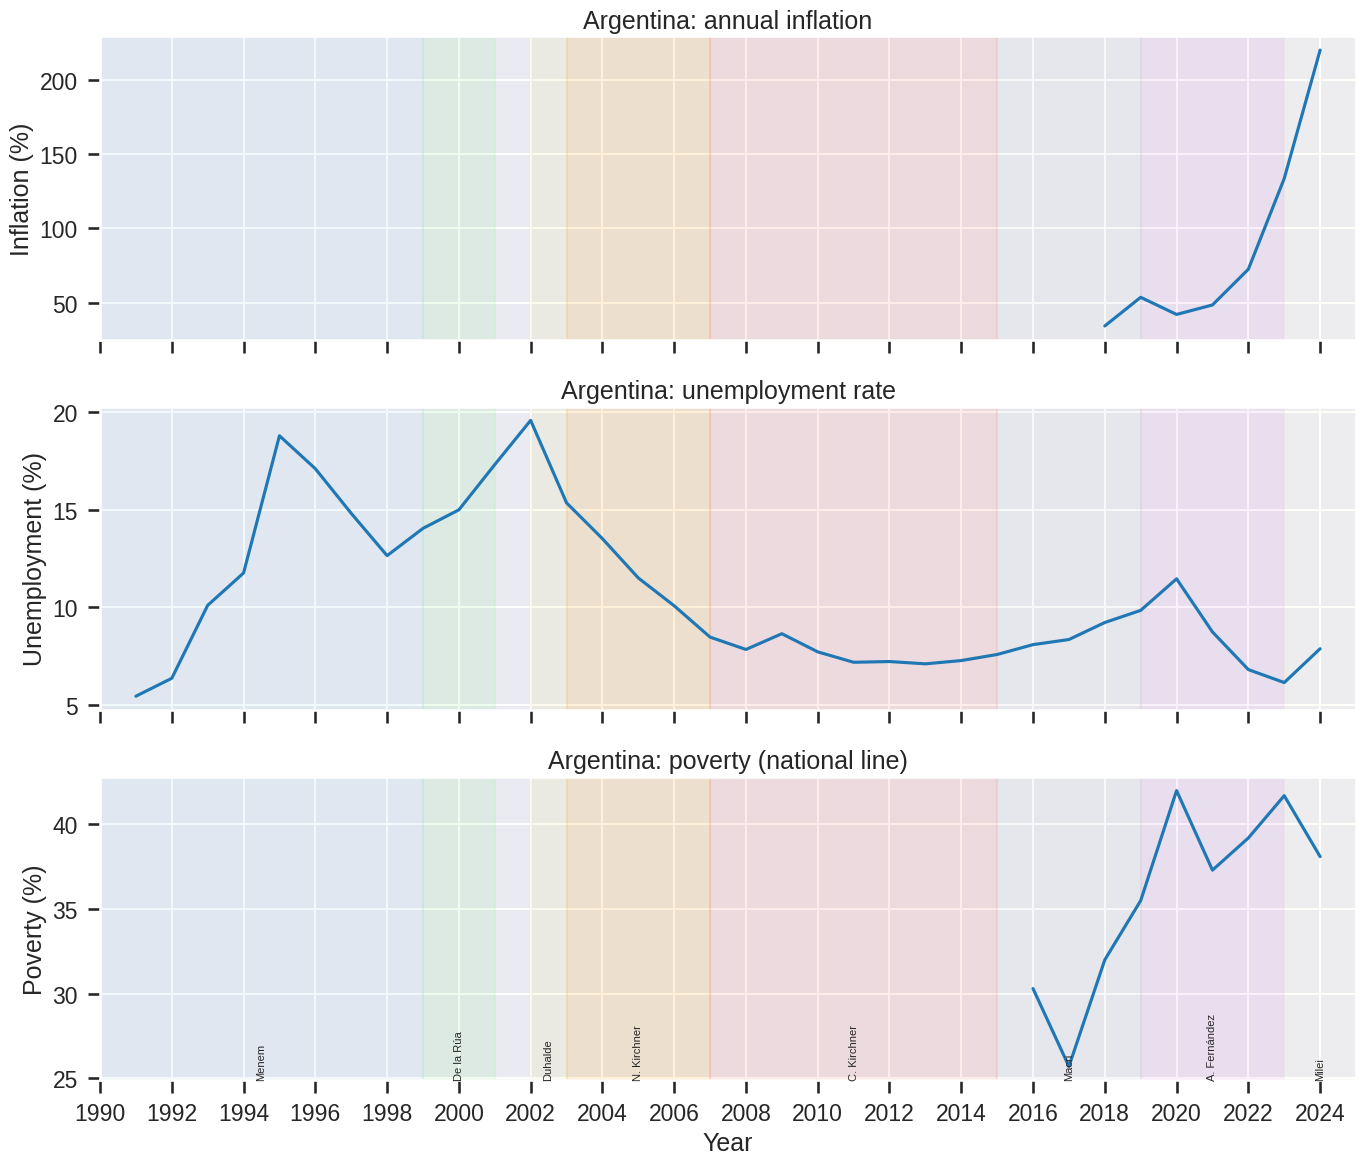

In [16]:
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Time series
sns.lineplot(data=macro_ar, x="year", y="inflation", ax=axes[0])
axes[0].set_ylabel("Inflation (%)")
axes[0].set_title("Argentina: annual inflation")

sns.lineplot(data=macro_ar, x="year", y="unemployment", ax=axes[1])
axes[1].set_ylabel("Unemployment (%)")
axes[1].set_title("Argentina: unemployment rate")

sns.lineplot(data=macro_ar, x="year", y="poverty", ax=axes[2])
axes[2].set_ylabel("Poverty (%)")
axes[2].set_title("Argentina: poverty (national line)")
axes[2].set_xlabel("Year")

# Governments (approximate year ranges)
governments = [
    (1990, 1999, "Menem", "lightblue"),
    (1999, 2001, "De la Rúa", "lightgreen"),
    (2002, 2003, "Duhalde", "khaki"),
    (2003, 2007, "N. Kirchner", "orange"),
    (2007, 2015, "C. Kirchner", "salmon"),
    (2015, 2019, "Macri", "lightgrey"),
    (2019, 2023, "A. Fernández", "plum"),
    (2023, 2025, "Milei", "lightyellow"),
]

for ax in axes:
    for start, end, label, color in governments:
        ax.axvspan(start, end, color=color, alpha=0.15)

for start, end, label, color in governments:
    mid = (start + end) / 2
    axes[-1].text(
        mid,
        axes[-1].get_ylim()[0],
        label,
        ha="center",
        va="bottom",
        fontsize=8,
        rotation=90
    )

axes[-1].set_xlim(1990, 2025)
axes[-1].set_xticks(range(1990, 2026, 2))

plt.tight_layout()
plt.show()


## Reading the time series (EN)

The three charts show that Argentina has not returned to low and stable inflation since the early 1990s, with strong spikes around major crises (2001–2002, the monetary tensions that start in 2018, and the latest jump in 2023–2024). Unemployment peaks in the early 2000s crisis and then fluctuates in a medium range, while poverty tends to increase in most periods of macro instability, even when unemployment is not at its maximum. Looking across governments, it becomes clear that episodes of financial stress or sharp devaluations usually combine higher inflation with higher poverty, which is a key constraint for any stabilization strategy.

## Lectura de las series (ES)

Los tres gráficos muestran que Argentina no vuelve a niveles bajos y estables de inflación desde comienzos de los años noventa, con picos fuertes en las grandes crisis (2001–2002), en las tensiones monetarias que comienzan en 2018 y en el salto de 2023–2024. El desempleo alcanza máximos en la crisis de comienzos de los 2000 y luego fluctúa en un rango medio, mientras que la pobreza tiende a aumentar en casi todos los episodios de inestabilidad macro, incluso cuando el desempleo no está en su punto más alto. Visto por gobiernos, se ve que los episodios de estrés financiero o devaluaciones bruscas suelen combinar más inflación con más pobreza, lo que es una restricción central para cualquier estrategia de estabilización.


## Correlation analysis / Análisis de correlaciones


In [17]:
# Correlation matrix
corr = macro_ar[["inflation", "unemployment", "poverty"]].corr()
corr

,inflation,unemployment,poverty
inflation,1.000000,-0.531069,0.291280
unemployment,-0.531069,1.000000,-0.024855
poverty,0.291280,-0.024855,1.000000


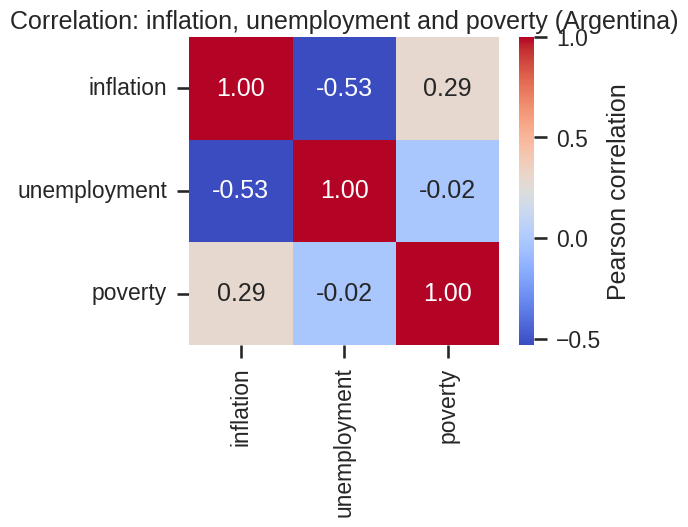

In [18]:
plt.figure(figsize=(5, 4))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    cbar_kws={"label": "Pearson correlation"}
)
plt.title("Correlation: inflation, unemployment and poverty (Argentina)")
plt.yticks(rotation=0)
plt.show()


## How to read this correlation heatmap (EN)

This heatmap summarizes how inflation, unemployment and poverty moved together in Argentina between 1990 and 2024. Each cell shows a number between -1 and 1: values close to 1 mean both variables tend to increase and decrease together, values close to -1 mean that when one goes up the other tends to go down, and values near 0 indicate almost no clear linear relationship. In these data, inflation and poverty have a moderate positive correlation, while the link between unemployment and poverty is close to zero, suggesting that Argentine poverty is driven not only by the unemployment rate but also by inflation and the quality of jobs.

## Cómo leer este mapa de calor de correlaciones (ES)

Este mapa de calor resume cómo se movieron juntas la inflación, el desempleo y la pobreza en Argentina entre 1990 y 2024. Cada casillero muestra un número entre -1 y 1: valores cercanos a 1 indican que las dos variables tienden a subir y bajar al mismo tiempo, valores cercanos a -1 indican que cuando una sube la otra suele bajar, y valores cerca de 0 indican que casi no hay relación lineal clara entre ellas. En estos datos, la inflación y la pobreza tienen una correlación positiva moderada, mientras que la relación entre desempleo y pobreza está cerca de cero, lo que sugiere que la pobreza argentina no depende solo del nivel de desempleo, sino también de la inflación y de la calidad del empleo.


## Key takeaways / Conclusiones clave

- **Inflation is the central macro problem.** Argentina has lived with high and unstable inflation for most of the period, and the latest jump to very high levels damages real wages, savings, and investment decisions, making long‑term planning extremely difficult.  
- **Poverty reacts to macro instability, not only to unemployment.** Increases in poverty tend to coincide with inflation spikes and crises, even in years when the unemployment rate is not at its peak, highlighting the role of real wage erosion and informality.  
- **Stabilization must be combined with social protection.** Any credible fiscal and monetary adjustment needs to consider its impact on poverty and inequality, otherwise macro improvements may come at the cost of deeper social exclusion.  
- **Data can help inform an “exit plan”.** Looking at simple, comparable indicators over time makes it easier to separate structural problems (chronic inflation, weak institutions) from temporary shocks, and to design policies that are consistent across different governments.

---

- **La inflación sigue siendo el problema macro central.** Argentina convive con inflación alta e inestable en casi todo el periodo, y el último salto a niveles muy elevados daña salarios reales, ahorros y decisiones de inversión, dificultando cualquier planificación de largo plazo.  
- **La pobreza reacciona a la inestabilidad macro, no solo al desempleo.** Los aumentos de pobreza tienden a coincidir con episodios de inflación y crisis, incluso en años en los que la tasa de desempleo no está en su máximo, lo que resalta el papel de la erosión del salario real y la informalidad.  
- **La estabilización tiene que ir de la mano de la protección social.** Cualquier ajuste fiscal y monetario creíble debe considerar su impacto sobre pobreza y desigualdad, porque una mejora macro que profundiza la exclusión social es políticamente inestable.  
- **Los datos ayudan a pensar el “plan de salida”.** Mirar indicadores simples y comparables en el tiempo permite separar problemas estructurales (inflación crónica, instituciones débiles) de shocks temporales, y diseñar políticas que puedan sostenerse a lo largo de varios gobiernos.
